In [ ]:
# Conncecting google drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
import glob

Mounted at /content/drive


In [ ]:
# Importing dataset
master = pd.read_csv('/content/drive/Shareddrives/Team Three Seasons/Cycle 2/Machine Learning Modeling/master_dataset.csv')
master = master.drop(columns = ['Unnamed: 0'])
master.head(5)

,label,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,...,jerk_Facc_z,jerk_Fgyro_x,jerk_Fgyro_y,jerk_Fgyro_z,jerk_Fazimuth,jerk_Fpitch,jerk_Froll,F_JerkMagAcc,F_JerkMagGyro,F_JerkMagOrient
0,FOL,4.062143,0.825714,-6.842143,-3.232143,-45.223571,-8.152143,-8.562143,-16.879286,13.062143,...,43.872644,434.299118,580.339274,327.374282,45.432196,63.944564,177.059356,89.865389,795.351065,193.656932
1,LYI,3.540588,-0.032941,-9.057059,5.231765,10.488824,-1.468235,-20.340588,-28.969412,31.117059,...,119.848392,945.938775,2138.642020,1324.071582,260.233400,233.974151,537.658986,182.676647,2687.332397,641.515792
2,STD,9.128462,0.350000,-1.930000,8.650000,0.451538,0.440769,-8.481538,-12.077692,-8.653846,...,271.129474,1133.364126,2833.406320,1567.253216,615.586278,731.541562,932.945095,374.634707,3430.595905,1335.846576
3,FOL,4.588000,-4.936000,-5.080000,-18.074000,-43.024000,77.312000,-0.900000,7.214000,24.262000,...,190.751915,892.609150,529.150078,706.207600,37.519810,145.479637,160.064471,357.884730,1255.181291,219.528348
4,LYI,-2.925714,-9.055714,-5.245714,0.117619,2.970000,-5.240000,1.294286,17.440000,53.988095,...,126.295759,1138.978818,1709.810468,2253.965340,185.945049,373.944797,533.515150,352.092663,3049.767916,677.531318


In [ ]:
# Dropping Na values
master = master.dropna()

In [ ]:
print('Size of dataset is', master.shape, '\n')
master.head(5)

Size of dataset is (55, 79) 



,label,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,...,jerk_Facc_z,jerk_Fgyro_x,jerk_Fgyro_y,jerk_Fgyro_z,jerk_Fazimuth,jerk_Fpitch,jerk_Froll,F_JerkMagAcc,F_JerkMagGyro,F_JerkMagOrient
0,FOL,4.062143,0.825714,-6.842143,-3.232143,-45.223571,-8.152143,-8.562143,-16.879286,13.062143,...,43.872644,434.299118,580.339274,327.374282,45.432196,63.944564,177.059356,89.865389,795.351065,193.656932
1,LYI,3.540588,-0.032941,-9.057059,5.231765,10.488824,-1.468235,-20.340588,-28.969412,31.117059,...,119.848392,945.938775,2138.642020,1324.071582,260.233400,233.974151,537.658986,182.676647,2687.332397,641.515792
2,STD,9.128462,0.350000,-1.930000,8.650000,0.451538,0.440769,-8.481538,-12.077692,-8.653846,...,271.129474,1133.364126,2833.406320,1567.253216,615.586278,731.541562,932.945095,374.634707,3430.595905,1335.846576
3,FOL,4.588000,-4.936000,-5.080000,-18.074000,-43.024000,77.312000,-0.900000,7.214000,24.262000,...,190.751915,892.609150,529.150078,706.207600,37.519810,145.479637,160.064471,357.884730,1255.181291,219.528348
4,LYI,-2.925714,-9.055714,-5.245714,0.117619,2.970000,-5.240000,1.294286,17.440000,53.988095,...,126.295759,1138.978818,1709.810468,2253.965340,185.945049,373.944797,533.515150,352.092663,3049.767916,677.531318


In [ ]:
# Getting test, train data
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel

# Seperating features and variables
y = master['label']
X = master.drop('label', axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=6)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

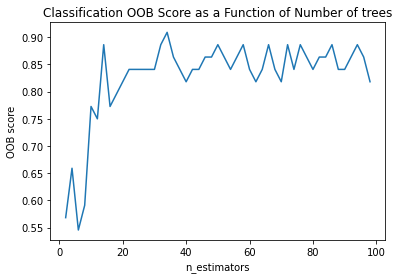

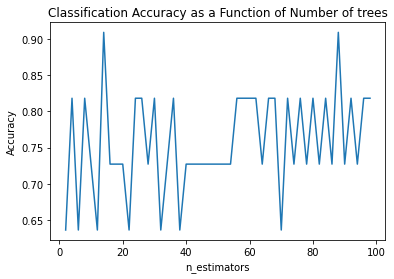

In [ ]:
# Trying to see how many trees to have 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

n_trees = list(range(2,100,2))
oob_score_list = []
accuracy_list = []

for i in n_trees:
    clf = RandomForestClassifier(n_estimators = i, oob_score = True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    oob_score = clf.oob_score_
    oob_score_list.append(oob_score)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy_score)

#create plot to show relationship between numbers of trees and OOB score 

plt.plot(n_trees, oob_score_list)
plt.xlabel("n_estimators")
plt.ylabel("OOB score")
plt.title("Classification OOB Score as a Function of Number of trees")
plt.show()

plt.plot(n_trees, accuracy_list)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy as a Function of Number of trees")
plt.show()

In [ ]:
def plot_feature_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)

  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data) 
  #keep only the top 20 features
  fi_df= fi_df.head(40)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(24,18))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')


def importance_dataframe(importance,names,model_type):
    #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)

  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data) 
  return fi_df

In [ ]:
#finding the most important features
#using 60 treees
clf = RandomForestClassifier(n_estimators = 60, 
                             criterion = "gini",oob_score = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         FOL       1.00      1.00      1.00         2
         LYI       0.75      1.00      0.86         3
         SIT       0.00      0.00      0.00         1
         STD       0.50      0.50      0.50         2
         WAL       0.67      0.67      0.67         3

    accuracy                           0.73        11
   macro avg       0.58      0.63      0.60        11
weighted avg       0.66      0.73      0.69        11



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


None


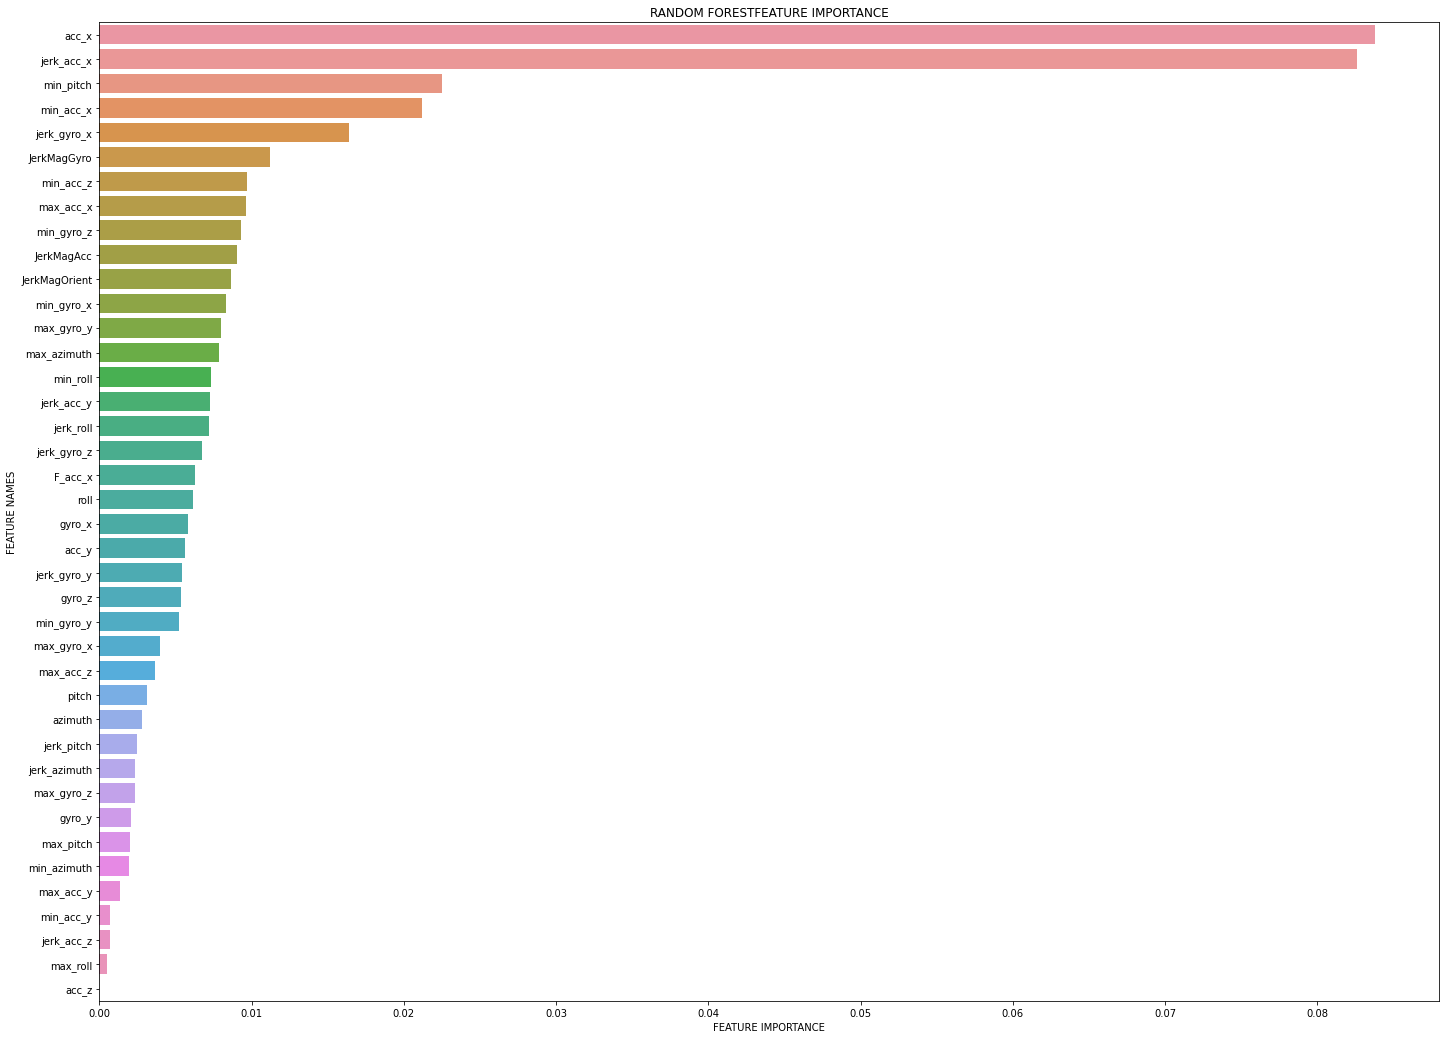

In [ ]:
print(plot_feature_importance(clf.feature_importances_,X.columns,'RANDOM FOREST'))
feature_importances = importance_dataframe(clf.feature_importances_,X.columns,'RANDOM FOREST')

In [ ]:
# Feature Selection
a = master['label'].replace(['FOL', 'LYI', 'STD', 'WAL', 'SIT'],[0, 1, 2, 3, 4],inplace=False)
b = master
b['label'] = a
c = b.corr().abs()
s = c.unstack(level=-1)
sorted = s['label'].sort_values(ascending=False)
top = sorted[sorted > 0.3]
top = top.reset_index(drop=False)
print('Top Correlated Features are', top)
new_columns = top['index']
new_master = master[new_columns]

Top Correlated Features are               index         0
0             label  1.000000
1        Fmax_pitch  0.633235
2   F_JerkMagOrient  0.611448
3         Fmax_roll  0.596612
4            F_roll  0.595272
5        jerk_Froll  0.595272
6        Fmax_acc_z  0.525247
7      Fmax_azimuth  0.524928
8     jerk_Fazimuth  0.524719
9         F_azimuth  0.524719
10          F_pitch  0.510936
11      jerk_Fpitch  0.510936
12       Fmax_acc_x  0.506161
13      Fmax_gyro_z  0.494594
14      Fmax_gyro_y  0.489158
15      jerk_gyro_x  0.448182
16           gyro_x  0.448182
17       Fmax_acc_y  0.409292
18        min_acc_x  0.364655
19      JerkMagGyro  0.342702
20       Fmin_pitch  0.342443
21      min_azimuth  0.337496
22       max_gyro_x  0.322789
23       max_gyro_z  0.312383
24      jerk_gyro_z  0.308428
25           gyro_z  0.308428
26       max_gyro_y  0.300929
27          azimuth  0.300143
28     jerk_azimuth  0.300143


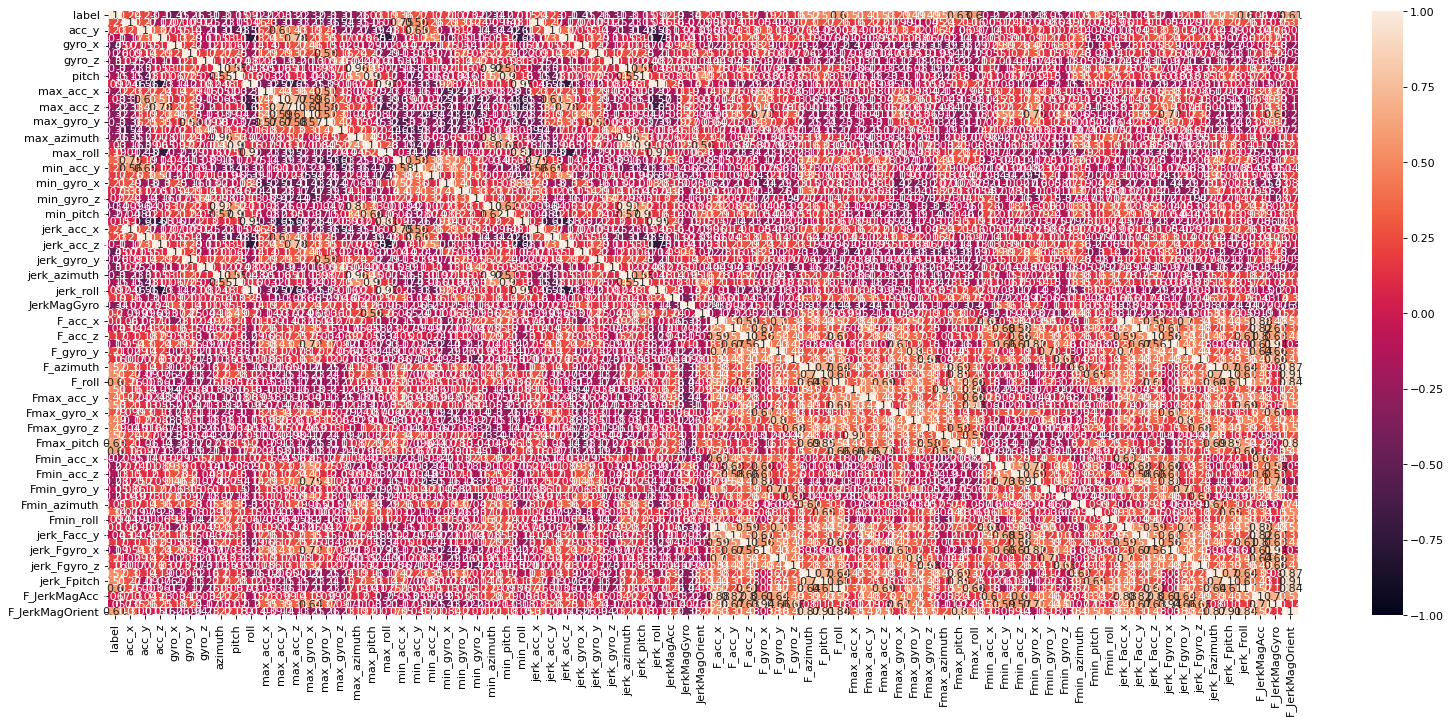

In [ ]:
# Visualizing Correlations
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24, 10), dpi=80)
sns.heatmap(b.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
# Trying again using only highly correlated features

# Seperating features and variables
y = new_master[['label']]
X = new_master.drop(columns = 'label')
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=6)

# Modeling using raw data
clf = RandomForestClassifier(n_estimators = 60, criterion = "gini", oob_score = True)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.75      1.00      0.86         3
           2       0.25      0.50      0.33         2
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         1

    accuracy                           0.64        11
   macro avg       0.60      0.57      0.54        11
weighted avg       0.70      0.64      0.61        11



<ipython-input-218-fb6d1240906f>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being 

In [ ]:
# Logistic Regression
# Train a LR model with best parameters
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
lrmodel_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, lrmodel_pred))

0.7272727272727273


In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         FOL       0.67      1.00      0.80         2
         LYI       1.00      0.33      0.50         3
         SIT       1.00      1.00      1.00         1
         STD       0.50      0.50      0.50         2
         WAL       0.75      1.00      0.86         3

    accuracy                           0.73        11
   macro avg       0.78      0.77      0.73        11
weighted avg       0.78      0.73      0.70        11



In [ ]:
from sklearn.svm import SVC
from sklearn import svm

regressor = SVC(C =10, kernel =  'rbf')
regressor = regressor.fit(X_train,y_train)
svm_pred = regressor.predict(X_test)
print(metrics.accuracy_score(y_test, svm_pred))

0.7272727272727273


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf = clf.fit(X_train, y_train)
y_true, y_pred = y_test , clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6363636363636364


# 1 minute Data Tolerance Testing (Cycle 2 objective)

In [ ]:
def df_maker(testdf, type_domain):
  means = pd.DataFrame()
  maxes = pd.DataFrame()
  mins = pd.DataFrame()
  Jerk = pd.DataFrame()

  #group all rows by label of activity
  test = testdf.groupby(['label'])

  #add min and max values
  tester = test.mean()
  maxx = testdf.groupby(['label']).max()
  minn = testdf.groupby(['label']).min()

  # Renaming
  if type_domain == 'freq':
    tester = tester.rename(columns={"acc_x": "F_acc_x", "acc_y": "F_acc_y", "acc_z": "F_acc_z", "gyro_x": "F_gyro_x", "gyro_y": "F_gyro_y", "gyro_z": "F_gyro_z", "azimuth": "F_azimuth", "pitch": "F_pitch", "roll": "F_roll"})
    maxx = maxx.rename(columns={"acc_x": "Fmax_acc_x", "acc_y": "Fmax_acc_y", "acc_z": "Fmax_acc_z", "gyro_x": "Fmax_gyro_x", "gyro_y": "Fmax_gyro_y", "gyro_z": "Fmax_gyro_z", "azimuth": "Fmax_azimuth", "pitch": "Fmax_pitch", "roll": "Fmax_roll"})
    minn = minn.rename(columns={"acc_x": "Fmin_acc_x", "acc_y": "Fmin_acc_y", "acc_z": "Fmin_acc_z", "gyro_x": "Fmin_gyro_x", "gyro_y": "Fmin_gyro_y", "gyro_z": "Fmin_gyro_z", "azimuth": "Fmin_azimuth", "pitch": "Fmin_pitch", "roll": "Fmin_roll"})
    
    # Jerk
    dt = 150E-3 # 150ms
    avg_jerkk = tester/dt
    avg_jerkk = avg_jerkk.rename(columns={"F_acc_x": "jerk_Facc_x", "F_acc_y": "jerk_Facc_y", "F_acc_z": "jerk_Facc_z", "F_gyro_x": "jerk_Fgyro_x", "F_gyro_y": "jerk_Fgyro_y", "F_gyro_z": "jerk_Fgyro_z", "F_azimuth": "jerk_Fazimuth", "F_pitch": "jerk_Fpitch", "F_roll": "jerk_Froll"})
    avg_jerkk['F_JerkMagAcc'] = np.sqrt((avg_jerkk['jerk_Facc_x'])**2 + (avg_jerkk['jerk_Facc_y'])**2 + (avg_jerkk['jerk_Facc_z'])**2)
    avg_jerkk['F_JerkMagGyro'] = np.sqrt((avg_jerkk['jerk_Fgyro_x'])**2 + (avg_jerkk['jerk_Fgyro_y'])**2 + (avg_jerkk['jerk_Fgyro_z'])**2)
    avg_jerkk['F_JerkMagOrient'] = np.sqrt((avg_jerkk['jerk_Fazimuth'])**2 + (avg_jerkk['jerk_Fpitch'])**2 + (avg_jerkk['jerk_Froll'])**2)

  else:
    maxx = maxx.rename(columns={"acc_x": "max_acc_x", "acc_y": "max_acc_y", "acc_z": "max_acc_z", "gyro_x": "max_gyro_x", "gyro_y": "max_gyro_y", "gyro_z": "max_gyro_z", "azimuth": "max_azimuth", "pitch": "max_pitch", "roll": "max_roll"})
    minn = minn.rename(columns={"acc_x": "min_acc_x", "acc_y": "min_acc_y", "acc_z": "min_acc_z", "gyro_x": "min_gyro_x", "gyro_y": "min_gyro_y", "gyro_z": "min_gyro_z", "azimuth": "min_azimuth", "pitch": "min_pitch", "roll": "min_roll"})

    # Jerk
    dt = 150E-3 # 150ms
    avg_jerkk = tester/dt
    avg_jerkk = avg_jerkk.rename(columns={"acc_x": "jerk_acc_x", "acc_y": "jerk_acc_y", "acc_z": "jerk_acc_z", "gyro_x": "jerk_gyro_x", "gyro_y": "jerk_gyro_y", "gyro_z": "jerk_gyro_z", "azimuth": "jerk_azimuth", "pitch": "jerk_pitch", "roll": "jerk_roll"})
    avg_jerkk['JerkMagAcc'] = np.sqrt((avg_jerkk['jerk_acc_x'])**2 + (avg_jerkk['jerk_acc_y'])**2 + (avg_jerkk['jerk_acc_z'])**2)
    avg_jerkk['JerkMagGyro'] = np.sqrt((avg_jerkk['jerk_gyro_x'])**2 + (avg_jerkk['jerk_gyro_y'])**2 + (avg_jerkk['jerk_gyro_z'])**2)
    avg_jerkk['JerkMagOrient'] = np.sqrt((avg_jerkk['jerk_azimuth'])**2 + (avg_jerkk['jerk_pitch'])**2 + (avg_jerkk['jerk_roll'])**2)


  #add aggregated data into master data frame
  means = means.append(tester)
  mins = mins.append(minn)
  maxes = maxes.append(maxx)
  Jerk = Jerk.append(avg_jerkk)

  # Moving labels from index to a column
  means = means.reset_index(drop=False)
  maxes = maxes.reset_index(drop=False)
  mins = mins.reset_index(drop=False)
  Jerk = Jerk.reset_index(drop=False)

  maxes = maxes.drop(columns = ['label'])
  mins = mins.drop(columns = ['label'])
  Jerk = Jerk.drop(columns = ['label'])

  master = pd.concat([means,maxes,mins,Jerk], axis=1)
  return master

In [ ]:
import numpy as np
time_test = pd.read_csv('/content/drive/Shareddrives/Team Three Seasons/Cycle 2/Falling data/fall_data/Cycle 2 1 min objective test/time_test - Sheet1.csv')
master = pd.DataFrame()
inter = pd.DataFrame()
freq_inter = pd.DataFrame()
features = time_test.drop(columns = ['label'])
freqs_magnitude = pd.DataFrame()
for idx in features.columns:
  transformed_y = np.fft.fft(time_test[idx])
  # Take the absolute value of the complex numbers for magnitude spectrum
  freqs_magnitude[idx] = np.abs(transformed_y)
  freqs_magnitude['label'] = time_test['label']

for index, row in time_test.iterrows():
  a = pd.DataFrame(row).transpose()
  inter = inter.append(df_maker(a, 'time'))
  # Apppending
  freq_inter = freq_inter.append(df_maker(a, 'freq'))
  freq_inter = freq_inter.drop(columns = ['label'])


timetest_master = pd.concat([inter,freq_inter], axis=1)

In [ ]:
y = timetest_master['label']
X = timetest_master.drop('label', axis=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
y_pred = clf.predict(X_std)
times = np.linspace(0,20.7,139)
timetest_master.insert(0,'Prediction',y_pred)
timetest_master.insert(0,'Times',times)
a = timetest_master['label'].replace(['FOL', 'LYI', 'STD', 'WAL', 'SIT'],[1, 0, 0, 0, 0],inplace=False)
b = timetest_master['Prediction'].replace(['FOL', 'LYI', 'STD', 'WAL', 'SIT'],[1, 0, 0, 0, 0],inplace=False)
c = timetest_master
c['label'] = a
c['Prediction'] = b

In [ ]:
# Times at which we correctly predicted fall vs. no fall
correct_timings = c[c['label'] == c['Prediction']]['Times']
print(correct_timings) # Seconds
print('\nCorrectly Predicts Fall vs. No Fall', np.round(len(correct_timings)/len(c)*100), "%")

0     0.00
0     0.15
0     0.45
0     0.75
0     0.90
     ...  
0    19.95
0    20.10
0    20.40
0    20.55
0    20.70
Name: Times, Length: 113, dtype: float64

Correctly Predicts Fall vs. No Fall 81.0 %


In [ ]:
# import necessary libraries 
import pandas as pd 
import os 
import glob 
   
   
# use glob to get all the csv files  
# in the folder 
path = os.getcwd() 
csv_files = glob.glob(os.path.join(path, "*.csv")) 
 
master = pd.DataFrame() 
means = pd.DataFrame() 
 
location = '/content/drive/Shareddrives/Team Three Seasons/Cycle 2/Falling data/fall_data/Annotated Data'
standinglist = (os.listdir(location))

for i in standinglist:
  filepath = location + '/' + i 
  #convert file in testdf 
  testdf = pd.read_csv(filepath) 
  #group all rows by label of activity 
  test = testdf.groupby(['label']) 
  #add min and max values 
  tester = test.mean()
    

  #add aggregated data into master data frame 
  means = means.append(tester) 
 
# Moving labels from index to a column 
master = means.reset_index(drop=False) 